# Pricing a Used Toyota Corolla
### Shan Wang
### 29 August, 2022

## 1 Loading and Preprocessing the Data Set

Let us read the data set:

In [1]:
import pandas as pd

toyotaDF = pd.read_csv('ToyotaCorolla.csv', encoding = 'GBK' )
toyotaDF.info()
toyotaDF.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 1436 non-null   int64 
 1   Model              1436 non-null   object
 2   Price              1436 non-null   int64 
 3   Age_08_04          1436 non-null   int64 
 4   Mfg_Month          1436 non-null   int64 
 5   Mfg_Year           1436 non-null   int64 
 6   KM                 1436 non-null   int64 
 7   Fuel_Type          1436 non-null   object
 8   HP                 1436 non-null   int64 
 9   Met_Color          1436 non-null   int64 
 10  Color              1436 non-null   object
 11  Automatic          1436 non-null   int64 
 12  CC                 1436 non-null   int64 
 13  Doors              1436 non-null   int64 
 14  Cylinders          1436 non-null   int64 
 15  Gears              1436 non-null   int64 
 16  Quarterly_Tax      1436 non-null   int64 


,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,燭OYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0


We will use predictors Age_08_04, KM, Fuel_Type, HP, Automatic, Doors, Quarterly_Tax, Mfr_Guarantee, Guarantee_Period, Airco, Automatic_airco, CD_Player, Powered_Windows, Sport_Model and Tow_Bar to predict Price.

So delete irrelavant variables.

In [2]:
toyota = toyotaDF.drop(toyotaDF.columns[[0,1,4,5,9,10,12,14,15,17,19,21,22,23,26,28,30,31,32,34,35,36,37]], axis = 1)
toyota

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,Doors,Quarterly_Tax,Mfr_Guarantee,Guarantee_Period,Airco,Automatic_airco,CD_Player,Powered_Windows,Sport_Model,Tow_Bar
0,13500,23,46986,Diesel,90,0,3,210,0,3,0,0,0,1,0,0
1,13750,23,72937,Diesel,90,0,3,210,0,3,1,0,1,0,0,0
2,13950,24,41711,Diesel,90,0,3,210,1,3,0,0,0,0,0,0
3,14950,26,48000,Diesel,90,0,3,210,1,3,0,0,0,0,0,0
4,13750,30,38500,Diesel,90,0,3,210,1,3,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,3,69,1,3,1,0,0,1,1,0
1432,10845,72,19000,Petrol,86,0,3,69,0,3,0,0,0,0,1,0
1433,8500,71,17016,Petrol,86,0,3,69,0,3,0,0,0,0,0,0
1434,7250,70,16916,Petrol,86,0,3,69,1,3,0,0,0,0,0,0


Great dummies for Fuel_Type.

In [3]:
toyota.Fuel_Type.value_counts()

Petrol    1264
Diesel     155
CNG         17
Name: Fuel_Type, dtype: int64

In [4]:
FuelType = pd.get_dummies(toyota.Fuel_Type, prefix = 'Fuel_Type')
FuelType

,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1431,0,0,1
1432,0,0,1
1433,0,0,1
1434,0,0,1


In [5]:
toyota = toyota.join(FuelType)
toyota = toyota.drop(['Fuel_Type' , 'Fuel_Type_Petrol'], axis = 1 )
toyota

,Price,Age_08_04,KM,HP,Automatic,Doors,Quarterly_Tax,Mfr_Guarantee,Guarantee_Period,Airco,Automatic_airco,CD_Player,Powered_Windows,Sport_Model,Tow_Bar,Fuel_Type_CNG,Fuel_Type_Diesel
0,13500,23,46986,90,0,3,210,0,3,0,0,0,1,0,0,0,1
1,13750,23,72937,90,0,3,210,0,3,1,0,1,0,0,0,0,1
2,13950,24,41711,90,0,3,210,1,3,0,0,0,0,0,0,0,1
3,14950,26,48000,90,0,3,210,1,3,0,0,0,0,0,0,0,1
4,13750,30,38500,90,0,3,210,1,3,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,3,69,1,3,1,0,0,1,1,0,0,0
1432,10845,72,19000,86,0,3,69,0,3,0,0,0,0,1,0,0,0
1433,8500,71,17016,86,0,3,69,0,3,0,0,0,0,0,0,0,0
1434,7250,70,16916,86,0,3,69,1,3,0,0,0,0,0,0,0,0


For the label price, we usally take log.

In [6]:
import numpy as np

toyota['Price'] = np.log(toyota['Price'])

Split the data set to training and validation set. We use function `train_test_split()` here.

In [7]:
from sklearn.model_selection import train_test_split

X = toyota.drop(['Price'], axis = 1)
y = toyota['Price']
X_train0, X_test0, y_train0, y_test0 = train_test_split(X, y, test_size = 0.3, random_state = 1)

We firsty use function `MinMaxScaler` in package `sklearn.preprocessing` to scale the numeric variables to 0-1, and save the transformation to scalers. Then use `scaler.transform` to apply the transformation on the data. Data and label indicate the x and y

In [8]:
from sklearn.preprocessing import MinMaxScaler

#归一化
mm = MinMaxScaler()
scalerX = mm.fit(X_train0)
X_train = scalerX.transform(X_train0)
X_test= scalerX.transform(X_test0)

scalerY = mm.fit(y_train0.values.reshape(-1,1))
y_train = scalerY.transform(y_train0.values.reshape(-1,1))
y_test= scalerY.transform(y_test0.values.reshape(-1,1))
print('X_test:', X_test.shape, '\n',  X_test[:3,:],'\n', 'y_test:', y_test.shape, '\n', y_test[:3,:])

X_test: (431, 16) 
 [[0.56962025 0.23052816 0.22764228 0.         1.         0.25
  1.         0.         0.         0.         1.         1.
  0.         0.         0.         0.        ]
 [0.65822785 0.34257467 0.33333333 0.         1.         0.25
  1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.44303797 0.15569741 0.33333333 0.         1.         0.25
  0.         0.         1.         0.         1.         1.
  0.         1.         0.         0.        ]] 
 y_test: (431, 1) 
 [[0.45676658]
 [0.45653844]
 [0.44987618]]


Now we finish the preprocessing.

## 2 Training the Neural Network

In [9]:
from sklearn.neural_network import MLPRegressor

Since we have regression problem, we use the `MLPRegressor`.

`hidden_layer_sizes`: number of nodes in hidden layers. `c(2,3)` indicating there are 2 hidden layers, the first hidden layer has 2 neurons and the second one has 3.

`activation= 'tanh'`: activation function, we use `'tanh'` here. We can also choose `'identity'`, `relu` and so on.

`solver='sgd'`: The solver for weight optimization; default `adam`

`alpha=1e-3`: L2 penalty (regularization term) parameter.

`max_iter = 50`: maximum number of iterations.

`batch_size = 15`: size of minibatches for stochastic optimizers.

`learning_rate_init`: The initial learning rate used. It controls the step-size in updating the weights. Only used when solver=’sgd’ or ‘adam’.

`momentum`: Gradient Descent with Momentum considers the past gradients to smooth out the update. It computes an exponentially weighted average of your gradients, and then use that gradient to update your weights instead. It works faster than the standard gradient descent algorithm. It is a number between 0 to 1.

In [10]:
model = MLPRegressor(hidden_layer_sizes = (4,4), 
                      activation='tanh',
                      solver='sgd', 
                      alpha=1e-3, 
                      max_iter = 50, 
                      batch_size = 15, 
                      learning_rate_init = 0.1,
                      momentum = 0.9,
                      random_state=1
                      )

model.fit(X_train, y_train.ravel())

MLPRegressor(activation='tanh', alpha=0.001, batch_size=15,
             hidden_layer_sizes=(4, 4), learning_rate_init=0.1, max_iter=50,
             random_state=1, solver='sgd')

The weights and bias in the generated neural network can be found by `model.coefs_` and `model.intercepts_`.

In [11]:
model.coefs_

[array([[-0.18968351, -0.70616511, -0.43438319, -0.20525643],
        [-0.39403268, -0.52489088, -0.27749841, -0.14373143],
        [-0.20344684,  0.28224316, -0.0203396 ,  0.19269242],
        [-0.293044  ,  0.1009894 , -0.47163457,  0.16966086],
        [-0.31069275,  0.11209834, -0.33138809, -0.33924822],
        [ 0.22758483,  0.5935193 , -0.17635352,  0.18347995],
        [ 0.05746077,  0.11774473, -0.35850936, -0.55650242],
        [-0.33938273,  0.37007019, -0.41371267, -0.08521666],
        [ 0.15357937,  0.04843322,  0.17539713, -0.28568727],
        [ 0.07707997,  0.26146905, -0.50542659,  0.16006825],
        [ 0.22157428,  0.03628508, -0.23940351,  0.16045438],
        [-0.66574412,  0.01737967,  0.4214238 , -0.27752025],
        [-0.29575355,  0.04638452, -0.44265068,  0.17895732],
        [-0.27970252,  0.01191027,  0.02737215, -0.41048271],
        [ 0.07538254, -0.27456552,  0.10278326,  0.21041931],
        [-0.41473265, -0.12739537,  0.14570182, -0.11428962]]),
 array

In [12]:
model.intercepts_

[array([-0.79109011, -0.06278851,  0.27421118, -0.0086348 ]),
 array([-0.34182238,  0.57424652, -0.23252206,  1.05720052]),
 array([-0.13587307])]

## 3 Predict the validation set

Use trained model to predict test set. `predit()` here will use model to predict `X_test`.

In [13]:
preds = model.predict(X_test)

The prediction accuracy can be calculated by function `score()`.

In [14]:
model.score(X_test, y_test)

0.863126595641802

Or by package `metrics`

In [15]:
from sklearn import metrics

def validation(y_true,y_pred):
    # MSE
    print('MSE:', metrics.mean_squared_error(y_true, y_pred)) 
    # RMSE
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_true, y_pred))) 
    # MAE
    print('MAE:', metrics.mean_absolute_error(y_true, y_pred)) 

validation(y_test,preds)

MSE: 0.0029145123401429053
RMSE: 0.05398622361438986
MAE: 0.04220817951233712


The valid-rmse is 0.054.

MSE: Mean Square Error

RMSE: Root Mean Squared Error

MAE: Mean Absolute Error


## 4 Tune the Model

Let us decrease the learning rate and increase the number of ierations.

In [16]:
model2 = MLPRegressor(hidden_layer_sizes = (4,5), 
                      activation='tanh',
                      solver='sgd', 
                      alpha=1e-3, 
                      max_iter = 100, 
                      batch_size = 15, 
                      learning_rate_init = 0.05,
                      momentum = 0.9,
                      random_state=1
                      )

model2.fit(X_train, y_train.ravel())

MLPRegressor(activation='tanh', alpha=0.001, batch_size=15,
             hidden_layer_sizes=(4, 5), learning_rate_init=0.05, max_iter=100,
             random_state=1, solver='sgd')

In [17]:
preds2 = model2.predict(X_test)
print('Accuracy:', model2.score(X_test, y_test))
validation(y_test,preds2)

Accuracy: 0.858581057903471
MSE: 0.0030113026983068707
RMSE: 0.054875337796745
MAE: 0.042384821765975474


The valid-rmse is 0.055， which is better than the previous model.

### 4.1 Plot the Predicted Price and True Price
The current preds2 are the labels normalized. Let us reset them.

In [18]:
y_train0

674     8.839277
1221    9.047821
991     8.980927
323     9.328123
842     9.259131
          ...   
715     9.046644
905     9.205328
1096    8.974618
235     9.363061
1061    8.665613
Name: Price, Length: 1005, dtype: float64

In [19]:
real_preds2 = np.exp(scalerY.inverse_transform(preds2.reshape(-1,1)))

In [20]:
result_compare2 = pd.DataFrame({'True': np.exp(y_test0.values),
                                'Predict:': real_preds2.flatten()
                                })
#按真实价格排序
result_compare2=result_compare2.sort_values(by='True')
result_compare2 = result_compare2.reset_index(drop=True) 

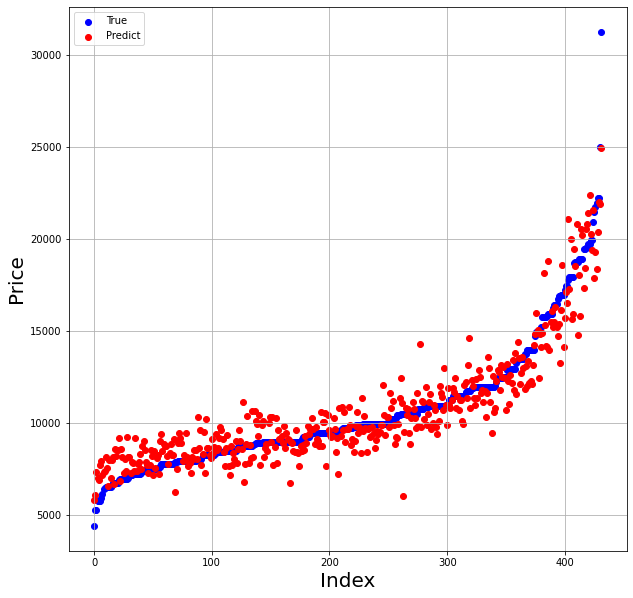

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

num_index=result_compare2.shape[0]

plt.figure(figsize=(10,10))
plt.scatter(np.linspace(0,num_index,num_index), y=result_compare2.iloc[:,0], c ='blue', label = 'True')
plt.scatter(np.linspace(0,num_index,num_index), y=result_compare2.iloc[:,1], c ='red', label = 'Predict')
plt.xlabel('Index', fontdict={'size':20})
plt.ylabel('Price', fontdict={'size':20})
plt.legend()
plt.grid() 
plt.show()

In [22]:
validation(real_preds2.flatten(),np.exp(y_test0))

MSE: 1407493.4401652606
RMSE: 1186.378287126522
MAE: 892.4224666775725


The mean absolute deviation is $892.